# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
display (data.head(10)) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


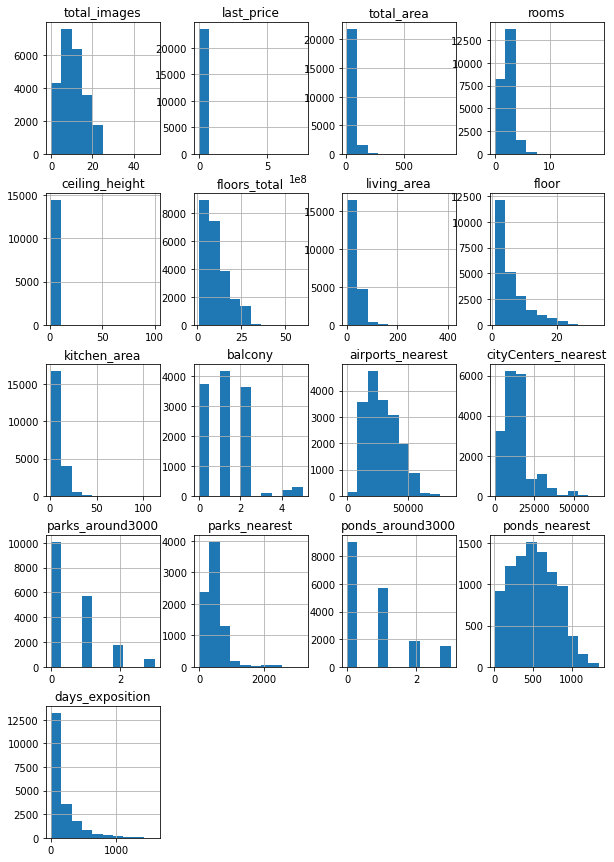

In [3]:
#Построим гистограммы по каждому столбцу
data.hist(figsize=(10, 15));

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
Такие предупреждения можно убрать 2 способами:
    
1. В конец кода добавить `plt.show()`, но для этого нужно вызвать библиотеку matplotlib.pyplot as plt
2. В конец кода добавить `;`
    
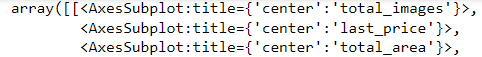
</div>

<div class="alert alert-info"> <b>Сделано)</b> </div>

In [4]:
#Посмотрим на пропущенные значения
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Описание данных**

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

**balcony** — число балконов

**ceiling_height** — высота потолков (м)

**cityCenters_nearest** — расстояние до центра города (м)

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

**first_day_exposition** — дата публикации

**floor** — этаж

**floors_total** — всего этажей в доме

**is_apartment** — апартаменты (булев тип)

**kitchen_area** — площадь кухни в квадратных метрах (м²)

**last_price** — цена на момент снятия с публикации

**living_area** — жилая площадь в квадратных метрах (м²)

**locality_name** — название населённого пункта

**open_plan** — свободная планировка (булев тип)

**parks_around3000** — число парков в радиусе 3 км

**parks_nearest** — расстояние до ближайшего парка (м)

**ponds_around3000** — число водоёмов в радиусе 3 км

**ponds_nearest** — расстояние до ближайшего водоёма (м)

**rooms** — число комнат

**studio** — квартира-студия (булев тип)

**total_area** — общая площадь квартиры в квадратных метрах (м²)

**total_images** — число фотографий квартиры в объявлении

**Проанализировав полученные данные, можно сделать следующие выводы:**

**cityCenters_nearest** - переименовать столбец

**first_day_exposition** - тип object - нужно изменить на тип datetime

**floors_total** - изменить на тип int: так как количество этажей это целое число, удалим строки с Null

**is_apartment** - измненить тип bool

**balcony** - изменить тип int, а также нулевые значения

**locality_name** - удалить строки с Null

**parks_around3000** - изменить на тип int

**ponds_around3000** - изменить на тип int

**days_exposition** - изменить на тип int

### Предобработка данных

In [5]:
#Переименуем столбец и посмотрим на результат
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Выполним обработку Null значений**

In [6]:
#Заменим значения Null на False, так как этот столбец имеет булев тип
data['is_apartment'] = data['is_apartment'].fillna('False') 

#Заменим значения Null на 0
data['balcony'] = data['balcony'].fillna(0)

data['floors_total'] = data['floors_total'].fillna(0)

data['is_apartment'] = data['is_apartment'].fillna(0)

data['parks_around3000'] = data['parks_around3000'].fillna(0)

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

data['days_exposition'] = data['days_exposition'].fillna(0)

#Удалим строки с Null
data['floors_total'].dropna(inplace=True)

data['locality_name'].dropna(inplace=True)

#Посмотрим измененнные данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Изменим типы данных**

In [7]:
#Оставим только дату без указания времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT')

data['floors_total'] = data['floors_total'].astype('int')

data['is_apartment'] = data['is_apartment'].astype('bool')

data['parks_around3000'] = data['parks_around3000'].astype('int')

data['ponds_around3000 '] = data['ponds_around3000'].astype('int')

data['days_exposition'] = data['days_exposition'].astype('int')

data['balcony'] = data['balcony'].astype('int')


#Посмотрим измененные данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Изучим уникальные значения столбца locality_name, выявим неявные дублиикаты и приведем к нужному нам виду**

In [8]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**План дальнейших действий:**

1) Приведем всё к одному регистру;

2) Заменим 'ё' на 'е';

3) 'Городской поселок' заменим на 'поселок городского типа';

4) Проверим на наличие дубликатов.



In [9]:
#Приведём всё к одному регистру
data['locality_name'] = data['locality_name'].str.lower()

#Заменим 'ё' на 'е'
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

#'Городской поселок' заменим на 'поселок городского типа'
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

#Проверим на наличие дубликатов
data.duplicated().sum()

0

**Найдем редкие и неправдопобные значения в столбцах.**

In [10]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ponds_around3000
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23699.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.635090,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,156.608844,0.590911
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.616396,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,213.546873,0.883999
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,22.000000,0.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,74.000000,0.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,199.000000,1.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,3.000000


**Изучим каждый из столбцов**

**total_images** - значения в норме, максимальное количество фото 50, вполне вероятно, почему бы и нет?

**last_price** - проведем анализ стоимости квартир.


In [11]:
print('Бесплатные квартиры:', data.query('last_price == 0')['last_price'].count())

print('Квартиры стоимостью меньше 100.000:', data.query('last_price < 1e+05')['last_price'].count())

print('Квартиры стоимостью больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())


Бесплатные квартиры: 0
Квартиры стоимостью меньше 100.000: 1
Квартиры стоимостью больше 100.000.000: 37


In [12]:
#Избавимся от выбросов в виде слишком дешёвой квартиры и квартир, стоимость которых превышает 100млн

data.drop(index=data.query('last_price > 1e+08').index,inplace=True)

data.drop(index=data.query('last_price < 1e+05').index,inplace=True)

**total_area** - посмотрим на квартиры, площади которых более 500 кв.м. Если их немного, то удалим значения, чтобы они не сказались на нашем анализе.

Площадь более 500 кв.м.: 3


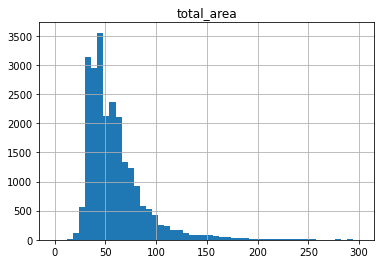

In [13]:
print('Площадь более 500 кв.м.:',data.query('total_area > 500')['total_area'].count())

data.hist('total_area', bins=50, range=(0,300));


In [14]:
data.drop(index=data.query('total_area > 500').index,inplace=True)

Рассмотрим столбец **rooms**. Есть минимальные значения, изучим их детальнее. Также смущает квартира, в которой 19 комнат. Такое возможно, конечно, но лучше удалим квартиры, количество комнат которых превышает число 7. 

In [15]:
#Возможно, что нулевое количество комнат это свободная планировка или студия, проверим эту гипотезу

print('Квартиры без комнат:',data.query('rooms == 0')['rooms'].count()) 

print('Квартиры без комнат и свободная планировка:',data.query('rooms == 0 and open_plan')['rooms'].count())

print('Квартиры без комнат и студии:',data.query('rooms == 0 and studio')['rooms'].count()) 

data.drop(index=data.query('rooms > 7').index,inplace=True)


Квартиры без комнат: 197
Квартиры без комнат и свободная планировка: 59
Квартиры без комнат и студии: 138


Данные сошлись. 

Приступим к изучению столбца **ceiling_height**.



In [16]:
print('Потолки от 4 до 5м: ' + str(data.query('ceiling_height > 4 and ceiling_height <= 5')['ceiling_height'].count()))

print('Потолки от 5 до 25м: ' + str(data.query('ceiling_height > 5 and ceiling_height < 25')['ceiling_height'].count()))

print('Потолки от 25м до 36м: ' + str(data.query('ceiling_height >= 25 and ceiling_height <= 36')['ceiling_height'].count()))

print('Потолки от 36м до 50м: ' + str(data.query('ceiling_height > 36 and ceiling_height < 50')['ceiling_height'].count()))

print('Потолки от 50м: ' + str(data.query('ceiling_height >= 50')['ceiling_height'].count()))

Потолки от 4 до 5м: 36
Потолки от 5 до 25м: 14
Потолки от 25м до 36м: 19
Потолки от 36м до 50м: 0
Потолки от 50м: 1


В соответствии с нормативом, в самых теплых зонах потолок должен располагаться на высоте не менее 2.7 метра, а для остальных районов минимальная высота потолка составляет 2.5 метра.
Максимальная высота потолков нормативными документами не оговаривается, но на практике потолок редко поднимают выше 3.2 метра. В зданиях старой постройки размеры помещений могут быть увеличены, в результате чего высота потолка может превысить отметку в 4 метра. 

Предположим, что квартиры с высотой потолков 25-36 метров являются опечаткой и соотвествуют значениям 2.5-3.6 метра.

Основываясь на предыдущем предположении, решим, что все квартиры с высотой потолков от 36 метров являются выбросами.

Также есть одно значение, которое показывает высоту потолков выше 50 метров.

Наши дальнейшие действия:

Удалим квартиры, высота потолков которых от 4 до 25 метров.
Потолки от 25 до 36 метров мы изменим на более реальные значения, для этого разделим на 10, получим 2.5 и 3.6 метра.
Удаляем квартиры с высотой потолков от 36 метров.

In [17]:
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)

data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)

data.drop(index=data.query('ceiling_height > 36').index,inplace=True)

Рассмотрим потолки, высота которых менее 2.5 метра

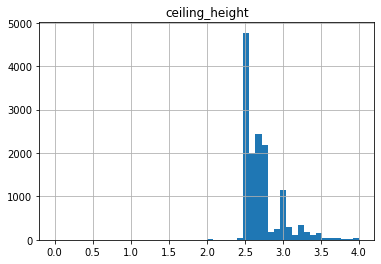

In [18]:
data.hist('ceiling_height',bins=50,range=(0,4));

In [19]:
#Удалим квартиры, высота потолков которых менее 2.5 метра

data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)

**floors_total** - Есть одноэтажные квартиры, но это не похоже на выброс. Так же есть небольшое количество квартир в 30 и более этажных домах.

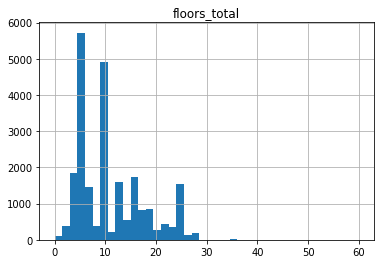

In [20]:
data.hist('floors_total', bins=40);

Рассмотрим столбец **living_area**, в котором хранятся данные о размере жилой площади в квартире. 

In [21]:
print('Жилая площадь меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())

print('Жилая площадь больше 200 кв.м.: ',data.query('living_area > 200')['living_area'].count())

Жилая площадь меньше 10 кв.м.:  25
Жилая площадь больше 200 кв.м.:  12


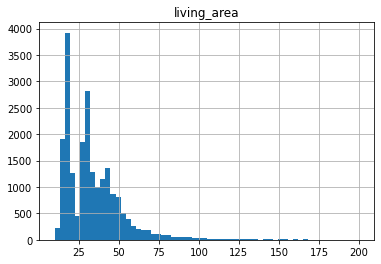

In [22]:
#Удалим эти значения, так как для наших данных они являются выбросами

data.drop(index=data.query('living_area < 10').index,inplace=True)

data.drop(index=data.query('living_area > 200').index,inplace=True)

data.hist('living_area', bins=60);

Посмотрим на столбец **floor**, который показывает, на каком этаже находится квартира.

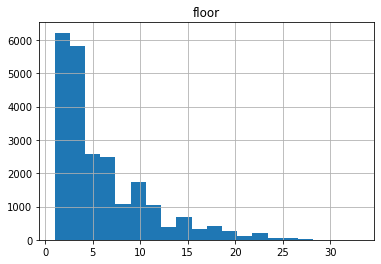

In [23]:
data.hist('floor',bins=20);

Распределение хорошее, оставляем всё как есть.

Проанализируем столбец **kitchen_area**, в котором содержатся значения площади кухни.

Площадь кухни меньше 2 кв.м.:  1
Площадь кухни 5 кв.м.:  351
Площадь кухни больше 50 кв.м.:  33


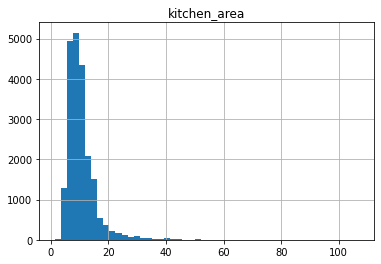

In [24]:
print('Площадь кухни меньше 2 кв.м.: ',data.query('kitchen_area < 2')['living_area'].count())

print('Площадь кухни 5 кв.м.: ',data.query('kitchen_area == 5')['living_area'].count())

print('Площадь кухни больше 50 кв.м.: ',data.query('kitchen_area > 50')['living_area'].count())

data.hist('kitchen_area', bins=50);

Удалим строки с площадью кухни менее 2 кв.м. и более 50 кв.м.

In [25]:
data.drop(index=data.query('kitchen_area < 2').index,inplace=True)

data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

Посмотрим на столбец **balcony**.

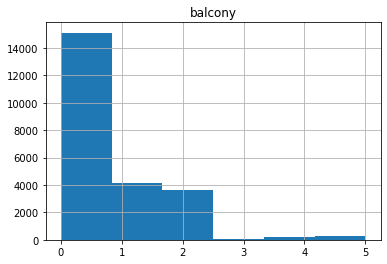

In [26]:
data.hist('balcony', bins=6);

Распределение выглядит хорошо.

**days_exposition** - сколько дней было размещено объявление. Объявления, которые висели дольше 3-х лет отбросим.

Объявлению больше 3 лет :  165


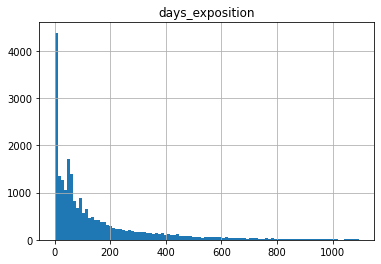

In [27]:
print('Объявлению больше 3 лет : ',data.query('days_exposition > 365*3')['days_exposition'].count())

data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

data.hist('days_exposition', bins=100);

**airports_nearest**

**city_centers_nearest**

**parks_around3000**

**parks_nearest**

**ponds_around3000**

**ponds_nearest**

Эти данные собраны автоматизированно. Посмотрим отдельно по каждому гистограммы.

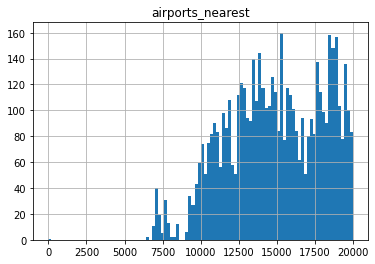

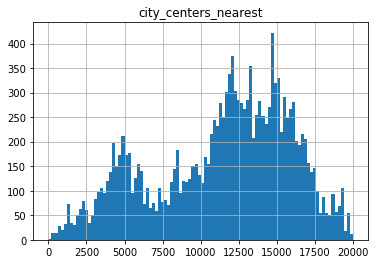

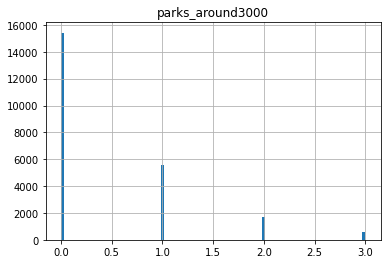

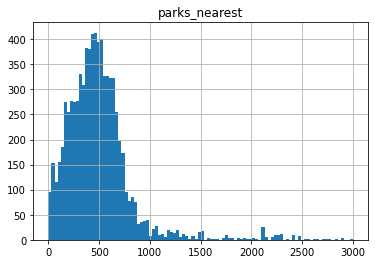

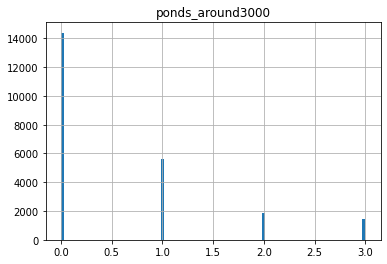

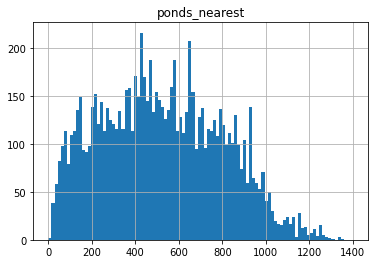

In [28]:
data.hist('airports_nearest', bins=100, range=(0,20000))

data.hist('city_centers_nearest', bins=100, range=(0,20000))

data.hist('parks_around3000', bins=100)

data.hist('parks_nearest', bins=100, range=(0,3000))

data.hist('ponds_around3000', bins=100)

data.hist('ponds_nearest', bins=100, range=(0,1400));

Можем заметить, что в столбце **airports_nearest** есть аномально низкие значения, посмотрим их и удалим.

In [29]:
print('Слишком близко к аэропорту:',data.query('airports_nearest < 5000')['airports_nearest'].count())

data.drop(index=data.query('airports_nearest < 5000').index,inplace=True)

Слишком близко к аэропорту: 1


Так как мы изрядно подчистили наши данные, нужно привести их к прилежному виду. Изменим индексацию.

In [30]:
data.reset_index(drop=True,inplace=True)

Произвели переименование столбца, изменили типы данных. Сделали обработку данных, а именно:

Избавились от неявных дубликатов;

Отбросили слишком дешёвые и дорогие квартиры;

Удалили квартиры, площадь которых более 500 кв.м.;

Изменили опечатки в данных о потолках, удалили подозрительные значения;

Убрали строки со слишком маленькими и большими жилыми площадями;

Почистили данные площади кухни;

Удалили объявления, которым более 3-х лет;

Отбросили квартиру, которая неправдоподобно близко располагалась к аэропорту.


### Посчитайте и добавьте в таблицу новые столбцы

**Цена одного квадратного метра:**

In [31]:
data['price_sqm'] = data['last_price'] / data['total_area']

**День публикации объявления (0 - понедельник, 1 - вторник и т.д.):**

In [32]:
data['dayofweek'] = data['first_day_exposition'].dt.dayofweek

**Месяц публикации объявления:**

In [33]:
data['month'] = data['first_day_exposition'].dt.month

**Год публикации объявления:**

In [34]:
data['year'] = data['first_day_exposition'].dt.year

**Тип этажа квартиры (значения — «первый», «последний», «другой»):**

In [35]:
#Напишем функцию, которая категоризирует этажи
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

#Создадим столбец, в который добавим категории, созданные нашей функцией  
data['floor_category'] = data.apply(floor_category, axis = 1)

#Это пригодится для подсчета корреляции в дальнейшем анализе
data['floor_category_value'] = data.apply(
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 1), axis=1
)

**Расстояние в км до центра города:**

In [36]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

### Проведите исследовательский анализ данных

In [37]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,ponds_around3000,price_sqm,dayofweek,month,year,floor_category_value,city_centers_nearest_km
count,23269.000000,2.326900e+04,23269.000000,23269.000000,14161.000000,23269.000000,21398.000000,23269.000000,21029.000000,23269.000000,...,23269.000000,8877.000000,23269.00000,23269.000000,23269.000000,23269.000000,23269.000000,23269.000000,23269.000000,17810.000000
mean,9.861876,6.108890e+06,59.077140,2.048004,2.718538,10.672397,33.750936,5.904078,10.375841,0.592075,...,0.583652,520.325898,148.29159,0.583652,98191.449578,2.572607,6.399630,2017.386867,1.015987,14.261426
std,5.674370,5.925284e+06,30.361778,1.020323,0.252113,6.623899,19.139593,4.892588,5.116384,0.959019,...,0.877694,277.843231,192.53927,0.877694,42180.520133,1.789443,3.487328,1.020240,0.512272,8.585143
min,0.000000,4.300000e+05,12.000000,0.000000,2.500000,0.000000,10.000000,1.000000,2.000000,0.000000,...,0.000000,13.000000,0.00000,0.000000,7962.962963,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,297.000000,22.00000,0.000000,76517.150396,1.000000,3.000000,2017.000000,1.000000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.050000,0.000000,...,0.000000,504.000000,72.00000,0.000000,94818.652850,3.000000,6.000000,2017.000000,1.000000,13.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.800000,16.000000,42.000000,8.000000,12.000000,1.000000,...,1.000000,733.000000,193.00000,1.000000,113772.455090,4.000000,10.000000,2018.000000,1.000000,16.000000
max,50.000000,9.900000e+07,494.100000,7.000000,4.000000,60.000000,200.000000,33.000000,50.000000,5.000000,...,3.000000,1344.000000,1095.00000,3.000000,848484.848485,6.000000,12.000000,2019.000000,2.000000,66.000000


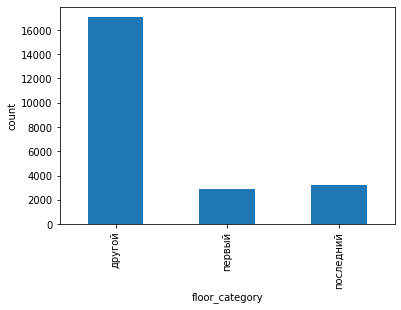

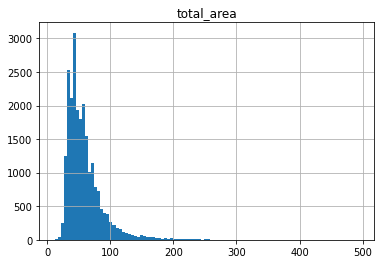

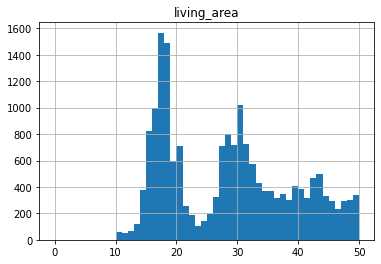

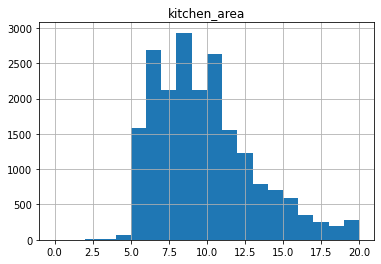

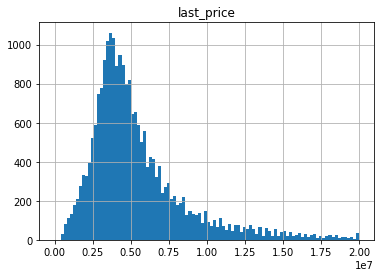

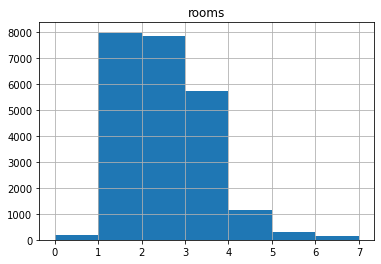

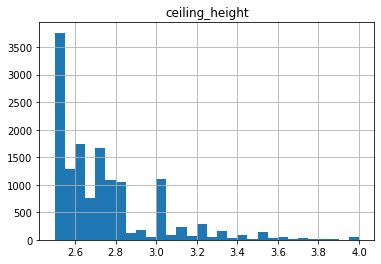

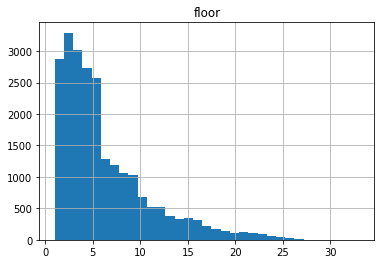

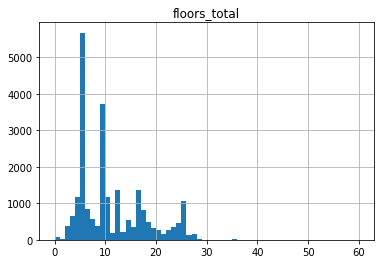

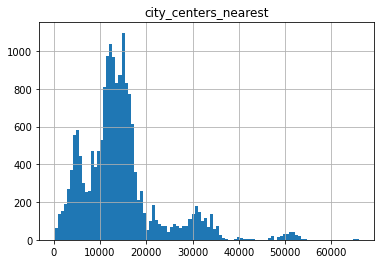

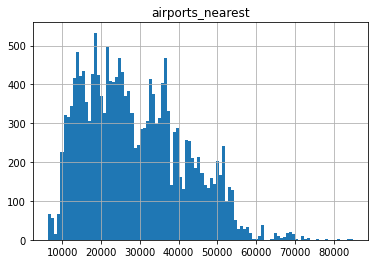

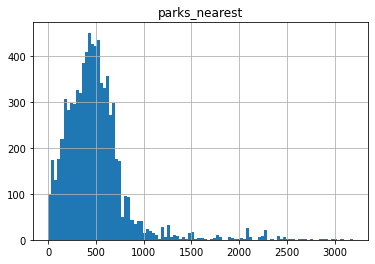

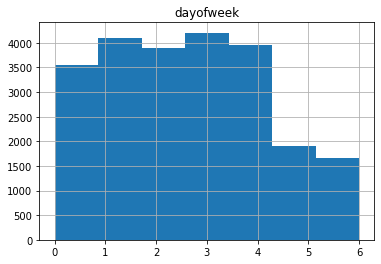

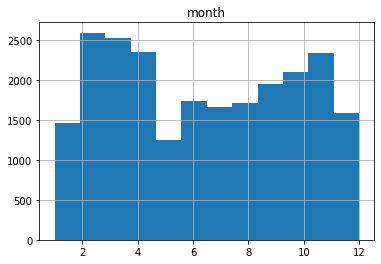

In [38]:
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count')

data.hist('total_area', bins=100)

data.hist('living_area', bins=50, range=(0,50))

data.hist('kitchen_area', bins=20, range=(0,20))

data.hist('last_price', bins=100, range=(0,2e+07))

data.hist('rooms', bins=data['rooms'].max())

data.hist('ceiling_height', bins=30)

data.hist('floor', bins=data['floor'].max())

data.hist('floors_total', bins=data['floors_total'].max())

data.hist('city_centers_nearest', bins=100)

data.hist('airports_nearest', bins=100)

data.hist('parks_nearest', bins=100)

data.hist('dayofweek', bins=7)

data.hist('month', bins=12);

**Построили гистограммы для:**

**Тип этажа квартиры** 

Больше всего квартир на "другом" этаже, это предсказуемо. Первые и последние этажи в равных значениях.

**Общая площадь** 

Больше всего квартир с площадью до 100 кв.м.

**Жилая площадь**

Можно заметит два пика: на 18 кв.м. и на 30 кв.м. Норма на 1 человека в России 18 кв.м.

**Площадь кухни**

Площадь кухни распределена хорошо.

**Цена объекта**

Немного "шумный" график. Можно заметить достаточно протяженный вправо "хвост", скорее всего это элитные квартиры.

**Количество комнат**

Большое количество двухкомнатных и трехкомнатных квартир, иногда встречается количество комнат, которых больше.

**Высота потолков**

Здесь два пика 2.5м и 3м, так и ожидалось.

**Этаж квартиры**
Больше всего квартир с 1 по 5 этаж.

**Общее количество этажей в доме**

Видим явные пики: 5-этажные дома, 9-этажные дома, стандартно для России. Также есть небольшие пики более высоких новостроек.

**Расстояние до центра города в метрах**

Здесь наблюдаем два пика, один маленький - 5км и другой побльшой от 10 км до 15 км. Так же есть совсем небольшие всплески на 30 км. и 50 км.

**Расстояние до ближайшего аэропорта**

Здесь видим довольно "шумный" график. Но это вполне нормально.

**Расстояние до ближайшего парка**

Судя по графику больше всего квартир с парками на расстоянии до 750м.

**День и месяц публикации объявления**

Видим провал в публикации объявлений в субботу и воскресенье, что логично. Так же видим что с февраля по апрель наблюдалась повышенная активность. Так же был плавный рост активности с июля по ноябрь. Провалы в декабре, январе и мае.

**Изучение days_exposition**

Среднее время продажи квартиры в днях: 148
Медианное время продажи квартиры в днях: 72
Количество объявлений, которые сняты через:
45 дней: 872
60 дней: 535
90 дней: 202


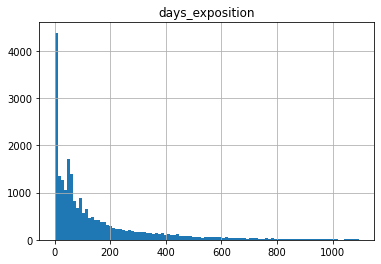

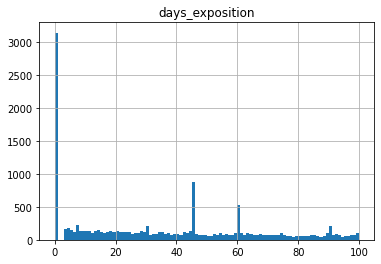

In [39]:
data.hist('days_exposition', bins=100)
data.hist('days_exposition', bins=100, range = (0,100))

print('Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))

print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))

print('Количество объявлений, которые сняты через:')

print('45 дней:',data[data['days_exposition']==45]['days_exposition'].count())
print('60 дней:',data[data['days_exposition']==60]['days_exposition'].count())
print('90 дней:',data[data['days_exposition']==90]['days_exposition'].count())

In [40]:
data['days_exposition'].describe()

count    23269.00000
mean       148.29159
std        192.53927
min          0.00000
25%         22.00000
50%         72.00000
75%        193.00000
max       1095.00000
Name: days_exposition, dtype: float64

Среднее время продажи квартиры составляет 148 день. Но если рассмотреть медианное значение - то время сокращается до 72 дней, в два раза меньше. Из-за большого разброса количества значений мы не можем судить только по среднему показателю, поэтому медиана расскажет нам настоящее положение дел.
Быстрыми продажами можно считать те, которые осуществились за 22 дня, а необычно долгими - свыше 193 дня. Выбросы, которые мы считали(45 дней, 60 и 90), похожи на платные объявлени с истекшим сроком размещения или работу ситемы удаления неактивных объявлений.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

In [41]:
influencing_values = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'floor_category_value',
                  'dayofweek',
                  'month',
                  'year'
                     ]

for value in influencing_values:
    correlation = data['last_price'].corr(data[value])
    print(f'Корреляция между last_price и {value} составляет: {correlation: 0.2}')

Корреляция между last_price и total_area составляет:  0.76
Корреляция между last_price и living_area составляет:  0.67
Корреляция между last_price и kitchen_area составляет:  0.56
Корреляция между last_price и rooms составляет:  0.46
Корреляция между last_price и floor_category_value составляет:  0.057
Корреляция между last_price и dayofweek составляет: -0.00093
Корреляция между last_price и month составляет:  0.0065
Корреляция между last_price и year составляет: -0.039


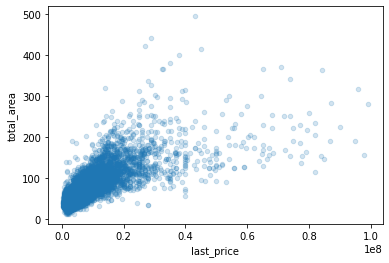

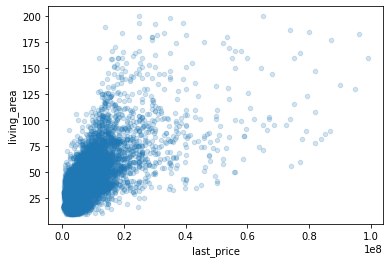

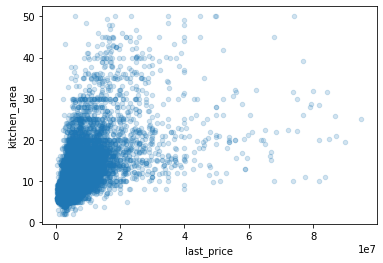

In [42]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)

data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2)

data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2);


Можем сделать вывод, что чем больше площадь(общая, жилая или кухни), тем выше стоимость. То есть существует прямая связь цены и площади.

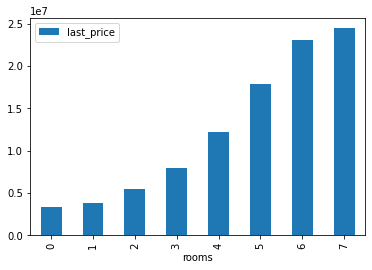

In [43]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar');

Логично, что вместе с увеличением комнат, цена будет пропорционально увеличиваться.

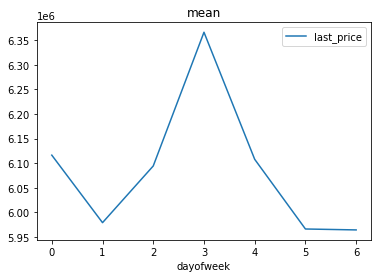

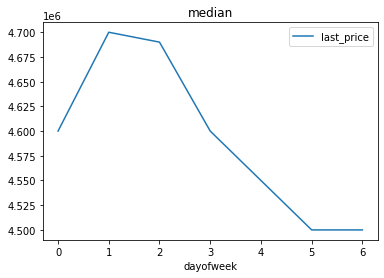

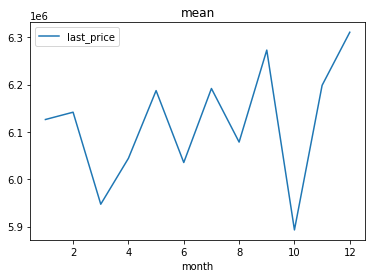

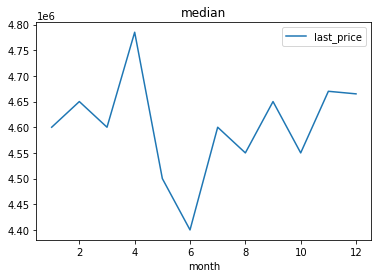

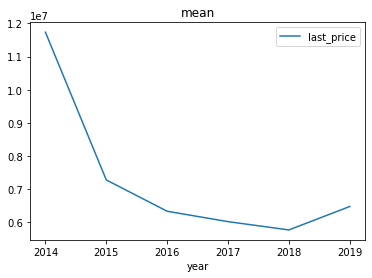

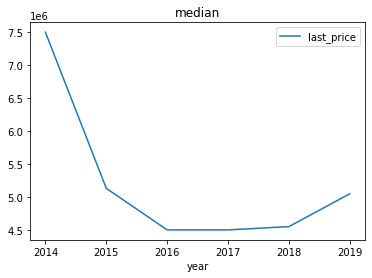

In [44]:
data.pivot_table(index='dayofweek',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')
data.pivot_table(index='dayofweek',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

data.pivot_table(index='month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

**День недели:** по медианным значениям можем сделать вывод, что в выходные дни выставлялись самые дешёвые квартиры.

**Месяц:** дороже всего квартиры, продающиеся с апреля, дешевле всего - в июне.

**Год:** квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.

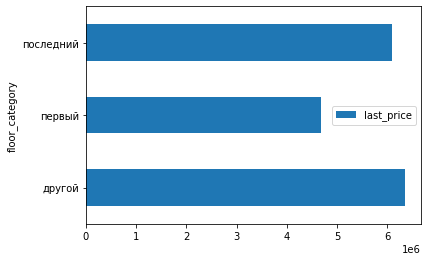

In [45]:
data.pivot_table(index='floor_category',values='last_price').plot(y='last_price', kind='barh');



Можем сделать вывод, что на стоимость квартиры большое влияние оказывают такие факторы, как:

Общая площадь квартиры;

Жилая площадь;

Площадь кухни;

Количество комнат.

Меньшее влияние оказывают этаж и дата размещения.

**Cредняя цена одного квадратного метра в топ-10 населенных пунктах:**

In [46]:
top_10 = data['locality_name'].value_counts().head(10)
top_10_price = data.query('locality_name in (@top_10.index)').pivot_table(values='price_sqm', index='locality_name')
top_10_price = top_10_price.astype(int)
top_10_price.sort_values('price_sqm', ascending=False)

,price_sqm
locality_name,
санкт-петербург,113133
пушкин,102898
деревня кудрово,92454
поселок парголово,90132
поселок мурино,85711
поселок шушары,78661
колпино,75329
гатчина,68746
всеволожск,68690


Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

**Средняя цена от центра Санкт-Петербурга:**

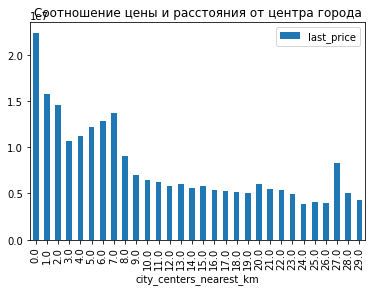

In [47]:
(
 data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar', title = 'Соотношение цены и расстояния от центра города')
);

Пик цены приходится на недвижимость, которая находится до 1км от центра. Можем заметить, что цена становится ниже на недвижимость, находящаяся на расстоянии от 1 км до 7 км включительно. Затем на расстоянии от 8 км до 26 км следует спад, вполне очевидно. Хотелось бы обратить внимание на пик, который приходится на 27км от центра, такой "выброс" не понятен, но смеем предположить, что в том районе есть "элитные" дома.

### Общий вывод

Мы можем сделать вывод, что любым данным, прежде всего, нужна предобработка, чтобы в дальнейшем уже по "чистым" данным мы могли сделать исследовательский анализ. В данном проекте мы работали с изменением регистров, убирали и заменяли нулевые и пропущенные значения, избавлялись от неявных дубликатов, а также изменяли типы данных. Это нам помогло в дальнейшем изучении данных. Мы исследовали каждый аспект объявлений о продажи квартиры, определили влияющие факторы на формирование стоимости квартиры, а именно: Общая площадь квартиры, её жилая площадь, площадь кухни и количество комнат. Быстрой продажей квартиры мы можем назвать сделки, которые совершились за 22 дня, а самые длительные продажи могли затянуться на несколько лет.

Также мы исследовали среднюю цену квадратного метра топ-10 населенных пуктов. Лидером этого списка стал прекрасный город Санкт-Петербург, в него вошло и множество питерских районов. В конце списка оказался город Выборг.

Посмотрели в городе Санкт-Петербург зависимость средней цены квадратного метра от близости к центру. Как и следовало ожидать, наибольший скачок цены оказался в радиусе до 1 км от центра. Также есть необычный пик на 27 км, мы предложили, что в том районе могут оказаться "элитные" дома.